In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib notebook

In [2]:
ts = fits.getdata("HST_COSMOS_features_adamamiller.fit")

In [8]:
mean_det = np.logical_not(ts["nDetections"] == 0)
suspect_phot = np.logical_and(ts["qualityFlag"] >= 64, ts["qualityFlag"] < 128)
poor_phot = np.logical_not(ts["qualityFlag"] < 128)

print("There are {:d} HST-PS1 matches".format(len(ts)))
print("\tOf these, {:d} are detected in >= 1 individual frame".format(sum(mean_det)))
print("\tand, {:d} have suspect photometry".format(sum(suspect_phot)))
print("\tand, {:d} have poor photometry".format(sum(poor_phot)))

There are 75927 HST-PS1 matches
	Of these, 47093 are detected in >= 1 individual frame
	and, 17 have suspect photometry
	and, 18136 have poor photometry


From here is seems clear that the criteria necessary to satisfy the "suspect" condition are relatively narrow, and the real issue is whether or not poor photometry significantly affects the model. 

Nearly 24% of all sources in the HST COSMOS-PS1 cross match have poor photometry. This has the potential to seriously jeopardize the efficacy of the model. 

In [9]:
print("Of the {} mean det sources, {} have suspect, and {} have poor photometry".format(sum(mean_det), sum(mean_det & suspect_phot), sum(mean_det & poor_phot)))

Of the 47093 mean det sources, 15 have suspect, and 2933 have poor photometry


On the other hand, only 6% of the sources that have detections in the mean catalog have poor photometry.

As shown below, these sources begin to dominate at wwKronMag ~ 23.7 mag, meaning they will dominate classifications for sources this faint [there will be few sources this faint with nDetections > 0].

In [10]:
whiteKronMag = -2.5*np.log10(ts["wwKronFlux"]/3631)

<IPython.core.display.Javascript object>


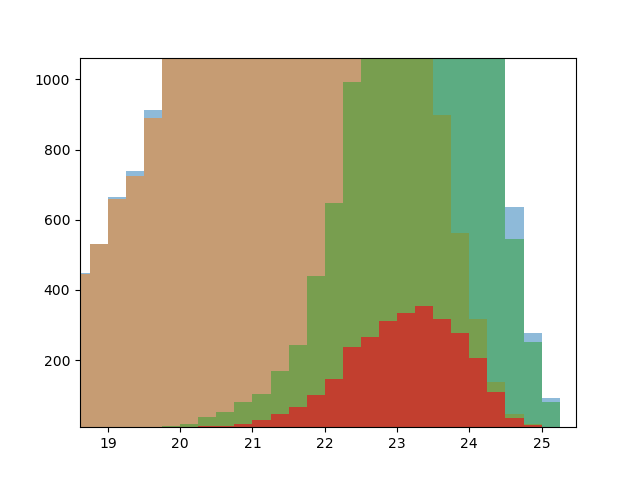

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    2.,    1.,    0.,    1.,    0.,    0.,
           0.,    1.,    3.,    2.,    3.,    5.,    6.,   13.,   12.,
          19.,   30.,   46.,   66.,  101.,  146.,  236.,  265.,  310.,
         333.,  354.,  318.,  277.,  207.,  108.,   36.,   14.,    4.]),
 array([ 14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
         16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
         18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
         20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
         22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
         24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25]),
 <a list of 45 Patch objects>)

In [16]:
plt.hist(whiteKronMag, bins=np.arange(14,25.5,0.25),alpha=0.5)
plt.hist(whiteKronMag[mean_det], bins=np.arange(14,25.5,0.25), alpha=0.5)
plt.hist(whiteKronMag[poor_phot], bins=np.arange(14,25.5,0.25), alpha=0.5)
plt.hist(whiteKronMag[poor_phot & mean_det], bins=np.arange(14,25.5,0.25), alpha=0.8)

Ultimately, we will train the model with the subset of sources with nDetections > 0. Sources with "suspect" and "poor" photometry will be left in the training set, such that the model can be applied to these sources, however, the final catalog will propagate these flags to alert users to the low confidence classifications.